In [100]:
import pandas as pd
import os as os
import numpy as np

In [101]:
os.getcwd()

'/Users/jbrable/M1_S2_Python'

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [102]:
dfclean=pd.read_csv("df_clean.csv").drop(['Unnamed: 0'], axis = 1)

# Model


## Preparing Data sets

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [104]:
# reordering df columns
dfx = dfclean.drop(['Price'], axis = 1)
dfy = dfclean['Price']
dfclean = pd.concat([dfx, dfy], axis = 1)
dfclean.head()

,mean_rates,Host Response Rate,Bathrooms,Bedrooms,Beds,Minimum Nights,Maximum Nights,Availability 90,Availability 365,Calculated host listings count,...,Country_Germany,Country_Greece,Country_Ireland,Country_Italy,Country_Netherlands,Country_Spain,Country_Switzerland,Country_United Kingdom,Country_United States,Price
0,9.471429,100.0,1.0,2.0,2.0,3.0,1125.0,89.0,364.0,2.0,...,0,0,0,0,0,0,0,1,0,57.2
1,9.642857,100.0,1.5,4.0,4.0,3.0,1125.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,1,0,180.7
2,9.328571,92.0,1.0,1.0,1.0,1.0,1125.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,1,0,91.0
3,10.000000,94.0,1.0,2.0,4.0,3.0,1125.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,1,0,91.0
4,9.328571,100.0,1.0,1.0,1.0,1.0,1125.0,89.0,359.0,1.0,...,0,0,0,0,0,0,0,1,0,32.5


In [105]:
#Split train and test set
train, test = train_test_split(dfclean, test_size=0.3,  random_state=42)
print(train.shape)
print(test.shape)
#print(dfclean.columns.tolist())

(313779, 287)
(134478, 287)


In [106]:
x_train = train.drop(['Price'],axis = 1 )
x_test = test.drop(['Price'],axis = 1 ) 
y_train = train["Price"].values
y_test = test['Price'].values

## Linear Regression

We begin our analysis by a quite simple model, that is, a multiple OLS regression.

In [107]:
import statsmodels.api as sm

mod = sm.OLS(y_train,x_train)
ols = mod.fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.782
Model:                            OLS   Adj. R-squared (uncentered):              0.782
Method:                 Least Squares   F-statistic:                              4058.
Date:                Tue, 31 May 2022   Prob (F-statistic):                        0.00
Time:                        18:36:46   Log-Likelihood:                     -1.8025e+06
No. Observations:              313779   AIC:                                  3.606e+06
Df Residuals:                  313502   BIC:                                  3.609e+06
Df Model:                         277                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
mean_rates                                7.0759      0.241     29.301      0.000       6.603       7.549
Host Response Rate                        0.1045      0.010     10.614      0.000       0.085       0.124
Bathrooms                                38.1590      0.311    122.699      0.000      37.549      38.769
Bedrooms                                 35.1391      0.246    142.764      0.000      34.657      35.622
Beds                                      4.8218      0.152     31.745      0.000       4.524       5.120
Minimum Nights                           -0.0009      0.001     -0.745      0.456      -0.003       0.001
Maximum Nights                        -7.745e-09   6.45e-09     -1.201      0.230   -2.04e-08     4.9e-09
Availability 90                           0.2844      0.006     48.267      0.000       0.273       0.296
Availability 365                          0.0178      0.001     12.396      0.000       0.015       0.021
Calculated host listings count            0.1375      0.004     38.040      0.000       0.130       0.145
Reviews per Month                        -2.5798      0.098    -26.364      0.000      -2.772      -2.388
How long Host                             0.0003      0.000      1.275      0.202      -0.000       0.001
baby-friendly                            -5.1734      1.293     -4.002      0.000      -7.707      -2.640
security                                 -1.9925      0.348     -5.727      0.000      -2.674      -1.311
secure_access                             4.2284      0.464      9.122      0.000       3.320       5.137
outdoor                                  -1.1301      4.111     -0.275      0.783      -9.188       6.928
bathroom_essentials                       3.6819      0.365     10.074      0.000       2.966       4.398
heating                                  -1.4753      0.547     -2.695      0.007      -2.548      -0.402
pool_jacuzzi                              9.1787      0.525     17.478      0.000       8.149      10.208
clothes_stuff                            -3.3667      0.529     -6.361      0.000      -4.404      -2.329
not specified                            24.3132      1.791     13.575      0.000      20.803      27.823
kitchen                                  -8.1402      0.581    -14.000      0.000      -9.280      -7.001
cooking basics                            2.7100      3.493      0.776      0.438      -4.136       9.556
tv                                       10.7665      0.334     32.241      0.000      10.112      11.421
family/kid friendly                       2.4481      0.311      7.877      0.000       1.839       3.057
internet        

In [108]:
# ols summary:
#R2=0.782
#multicolinearity is an issue

In [109]:
y_testpred=ols.predict(x_test)
y_testpred
mse_ols = mean_squared_error(y_test, y_testpred)
rmse_ols = mse_ols**.5
print(f'Mean Square Error with OLS = {mse_ols}')
print(f'Root Mean Square Error with OLS = {rmse_ols}')

Mean Square Error with OLS = 5831.355539410028
Root Mean Square Error with OLS = 76.36331278441257


## Lasso

This regression could help us to determine which variables we should constraint in the regression or the model.

In [110]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import lasso_path
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [111]:
sc = StandardScaler()

train_las, test_las = train_test_split(dfclean, test_size=0.3,  random_state=42)
sc_train =sc.fit_transform(train_las)

In [112]:
print(np.mean(sc_train, axis=0)) #0
print(np.var(sc_train, axis=0)) #1

[ 3.41281480e-15 -1.70559785e-16  1.64190967e-16  1.14763276e-16
 -2.46374199e-17  1.18601550e-18 -3.17025623e-18  7.95281420e-17
  7.99810358e-17 -5.34414622e-18  1.40385739e-16 -2.33919621e-17
 -2.42298155e-17 -2.03462516e-17 -3.91300198e-17 -9.80514963e-18
  1.83421968e-17  1.33105472e-16 -6.89304283e-17  5.66626690e-17
  1.49002043e-17 -2.98909873e-18  8.28795558e-18  1.17978821e-16
 -4.11001076e-17  2.18883548e-16 -9.52945056e-17 -8.36947645e-17
  4.04434116e-17  2.49997349e-17  1.08694499e-18  1.10506074e-17
  2.22031160e-17 -5.65890737e-17  4.97730228e-17 -1.15940799e-17
 -6.08151385e-17  1.56248343e-18  8.03116482e-16  6.70282746e-18
  2.24748522e-17 -7.41160618e-17 -3.13176026e-17  5.08486455e-17
 -2.95513170e-17  8.42382370e-18 -5.45736966e-17  9.36584270e-17
 -1.00723569e-16 -1.24240077e-16 -2.01084824e-17 -7.46255672e-17
 -4.17568035e-17  1.35868124e-19  9.36131376e-17  1.82969074e-17
 -7.51803621e-18  8.56082406e-17  4.42930085e-17  2.23729511e-17
 -1.74816986e-17  3.80430

In [113]:
# Lasso regression with default parameters
def_las = Lasso(fit_intercept=False,normalize=False)
print(def_las.get_params())

{'alpha': 1.0, 'copy_X': True, 'fit_intercept': False, 'max_iter': 1000, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}


In [114]:
#naive regression
ind = dfclean.columns.get_loc("Price")
sz_x_train = sc_train[:, :ind]
sz_y_train = sc_train[:, ind]
print(f'X columns: {sz_x_train} \n')
print(f'Price column: {sz_y_train} \n It is the {ind}th column.')

X columns: [[-0.26430859 -0.0877261  -0.40536254 ... -0.06457492 -0.38296798
  -0.62984326]
 [ 0.41514007  0.43544175 -0.40536254 ... -0.06457492 -0.38296798
  -0.62984326]
 [-1.47221731  0.04306586  0.49994751 ... -0.06457492  2.61118436
  -0.62984326]
 ...
 [ 0.91843537  0.43544175 -0.40536254 ... -0.06457492 -0.38296798
  -0.62984326]
 [-0.39013241  0.43544175 -0.40536254 ... -0.06457492 -0.38296798
  -0.62984326]
 [-0.26430859 -0.0877261  -0.40536254 ... -0.06457492 -0.38296798
  -0.62984326]] 

Price column: [-0.73723908 -0.85397454  0.32500713 ... -0.84327767 -0.30982916
 -0.89750617] 
 It is the 286th column.


In [115]:
def_las.fit(sz_x_train, sz_y_train)
# coefficients
print(def_las.coef_)

/Users/jbrable/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


[ 0.  0.  0.  0.  0.  0. -0.  0.  0.  0. -0.  0.  0.  0.  0.  0.  0.  0.
  0.  0. -0.  0. -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0. -0.  0.  0.  0. -0.  0.  0.  0. -0. -0.  0.  0.  0. -0. -0. -0.
 -0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.  0. -0.  0. -0. -0. -0.  0.
 -0. -0.  0.  0.  0.  0.  0. -0.  0. -0.  0.  0.  0.  0. -0.  0. -0. -0.
 -0. -0. -0.  0.  0.  0. -0.  0. -0. -0.  0. -0. -0.  0. -0.  0.  0. -0.
  0.  0. -0. -0.  0. -0.  0. -0. -0.  0. -0.  0. -0.  0. -0. -0.  0. -0.
 -0. -0. -0.  0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0.  0.  0.
 -0. -0. -0.  0.  0. -0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0.  0.  0.
 -0. -0.  0. -0.  0.  0. -0.  0.  0.  0. -0. -0. -0. -0. -0. -0.  0. -0.
  0.  0.  0.  0.  0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0.  0.  0. -0.
  0.  0. -0.  0. -0. -0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.
  0. -0.  0.  0. -0. -0. -0.  0.  0. -0.  0.  0.  0.  0.  0. -0.  0.  0.
  0.  0. -0.  0. -0. -0. -0.  0. -0. -0.  0.  0.  0

When alpha = 1, all coefficients are null : we have to test several values of alpha so as to tune this hyperparameter.

##### Lasso path

In [116]:
#10 alpha values to test
my_alphas = np.array([0.001,0.002, 0.003,0.004,0.005,0.01,0.02,0.025,0.05,0.1,0.25,0.5,0.8,1.0])

#my_alphas = np.linspace(start = 0.001, stop = 1.0, num = 1000) # more accurate but way less readable

In [117]:
#getting estimated coefficients using lasso_path() function
alpha_for_path, coefs_lasso, _ = lasso_path(sz_x_train,
                                            sz_y_train,
                                            alphas=my_alphas)
print(coefs_lasso.shape)

(286, 14)


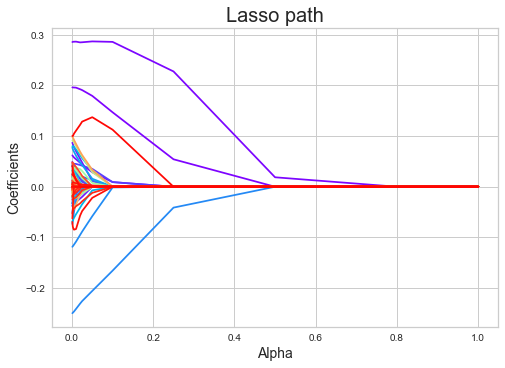

In [118]:
colors = cm.rainbow(np.linspace(0,1,289))

#lasso path graphic(one curve per feature)
for i in range(coefs_lasso.shape[0]):
    plt.plot(alpha_for_path, coefs_lasso[i,:], c = colors[i])

plt.xlabel('Alpha', fontsize = 14)
plt.ylabel('Coefficients', fontsize = 14)
plt.title('Lasso path', fontsize = 20)
plt.show()

We see that when alpha >0.6, only one coefficient is not null. When alpha > 0.8, all coefficients are = 0.

In [119]:
# let's be more accurate: we can numerically count non-null coefficients, for each alpha value
nbNonZero = np.apply_along_axis(func1d = np.count_nonzero,
                                arr = coefs_lasso,
                                axis = 0)

print(pd.DataFrame({'alpha':alpha_for_path,'Nb non-zero coefs':nbNonZero}))

    alpha  Nb non-zero coefs
0   1.000                  0
1   0.800                  0
2   0.500                  1
3   0.250                  3
4   0.100                  7
5   0.050                 20
6   0.025                 39
7   0.020                 48
8   0.010                 90
9   0.005                141
10  0.004                162
11  0.003                190
12  0.002                221
13  0.001                249


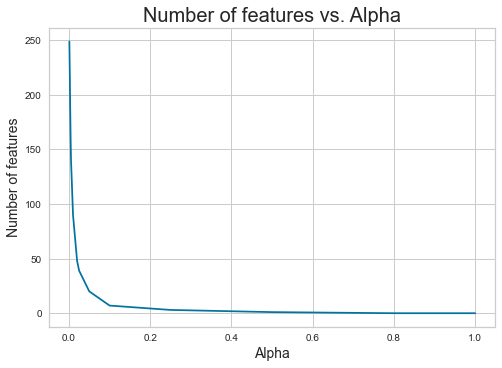

In [120]:
# thus graphically we obtain a decreasing curve:
plt.plot(alpha_for_path, nbNonZero)
plt.xlabel('Alpha', fontsize = 14)
plt.ylabel('Number of features', fontsize = 14)
plt.title('Number of features vs. Alpha', fontsize = 20)
plt.show()

##### Now we are going to opitmize our Lasso regression using K-fold cross validation

In [121]:
las_cv = LassoCV(alphas = my_alphas,
                 fit_intercept = False,
                 random_state = 42,
                 cv = 5)

las_cv.fit(sz_x_train, sz_y_train) 

LassoCV(alphas=array([0.001, 0.002, 0.003, 0.004, 0.005, 0.01 , 0.02 , 0.025, 0.05 ,
       0.1  , 0.25 , 0.5  , 0.8  , 1.   ]),
        cv=5, fit_intercept=False, random_state=42)

In [122]:
# Results
print(f'The MSE are: {las_cv.mse_path_} \n \n NB: We have one MSE per fold and per alpha (ie, K*len(my_alphas) values)!')

The MSE are: [[0.97729756 1.01195987 1.00284588 1.00080313 1.00709368]
 [0.97729756 1.01195987 1.00284588 1.00080313 1.00709368]
 [0.95643129 0.99490162 0.98384975 0.97996429 0.98995957]
 [0.74348111 0.77131254 0.76575165 0.76655622 0.76697577]
 [0.60907995 0.63204537 0.62914878 0.62907359 0.6279411 ]
 [0.55760206 0.57836097 0.57646884 0.57346984 0.57381177]
 [0.52241256 0.54146256 0.53935535 0.53603064 0.53755129]
 [0.51465772 0.53339562 0.53122161 0.52805387 0.52934226]
 [0.49678288 0.51448009 0.51211052 0.51030483 0.5107934 ]
 [0.48879155 0.50576576 0.50320879 0.50221781 0.50258689]
 [0.48747165 0.50423649 0.50160598 0.50084354 0.50104304]
 [0.48618267 0.50290061 0.50012062 0.49956668 0.49960959]
 [0.4851328  0.50181535 0.49887709 0.4985338  0.49843709]
 [0.48446006 0.50102994 0.49800421 0.49784583 0.49765043]] 
 
 NB: We have one MSE per fold and per alpha (ie, K*len(my_alphas) values)!


Let's compute the 'average MSE' for all folds, per alpha:

In [123]:
avg_mse = np.mean(las_cv.mse_path_,axis=1)
print(pd.DataFrame({'alpha':las_cv.alphas_,'MSE':avg_mse}))

    alpha       MSE
0   1.000  1.000000
1   0.800  1.000000
2   0.500  0.981021
3   0.250  0.762815
4   0.100  0.625458
5   0.050  0.571943
6   0.025  0.535362
7   0.020  0.527334
8   0.010  0.508894
9   0.005  0.500514
10  0.004  0.499040
11  0.003  0.497676
12  0.002  0.496559
13  0.001  0.495798


Equivalently, we can present our results graphically:

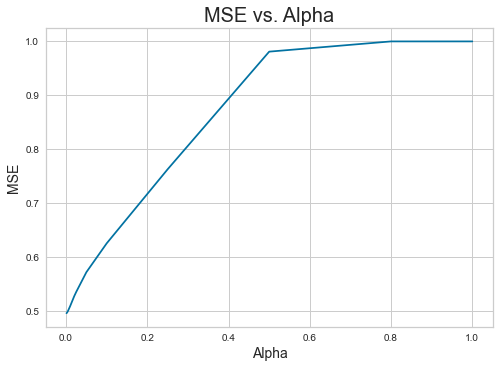

In [124]:
#sous-forme graphique
plt.plot(las_cv.alphas_, avg_mse)
plt.xlabel('Alpha', fontsize = 14)
plt.ylabel('MSE', fontsize = 14)
plt.title('MSE vs. Alpha', fontsize = 20)
plt.show()

We can identify which alpha is the best (ie, minimizes the MSE):

In [125]:
#best alpha
print(las_cv.alpha_)

0.001


In [126]:
var_name = dfclean.columns[:ind]

# coefficients for alpha = 0.001
coefs001 = coefs_lasso[:,13]

las_df = pd.DataFrame({'Features':var_name,'Coefficients':coefs001})
print(las_df)

                   Features  Coefficients
0                mean_rates      0.040313
1        Host Response Rate      0.013581
2                 Bathrooms      0.196195
3                  Bedrooms      0.285818
4                      Beds      0.061871
..                      ...           ...
281     Country_Netherlands      0.007555
282           Country_Spain     -0.069609
283     Country_Switzerland      0.000000
284  Country_United Kingdom      0.040969
285   Country_United States      0.100517

[286 rows x 2 columns]


##### Applying our optimized Lasso regression on test set

In [127]:
sc_test = sc.transform(test_las)
sz_x_test = sc_test[:,:ind]
sz_y_test = sc_test[:,ind]
s_yhat_lasso = las_cv.predict(sz_x_test)

# remove the scaler from the prediction; [-1] bc it's in last position
yhat_lasso = s_yhat_lasso*np.sqrt(sc.var_[-1]) + sc.mean_[-1]

# measuring the performance on the test set
mse_las = mean_squared_error(y_test, yhat_lasso)
rmse_las = mse_las**.5
print(f'Mean Square Error with Lasso: {mse_las} \n Root Mean Square Error with Lasso: {rmse_las} \n')
print(f'As a reminder, with OLS we had MSE = {mse_ols} and RMSE = {rmse_ols}')

Mean Square Error with Lasso: 5831.665579446424 
 Root Mean Square Error with Lasso: 76.36534279008 

As a reminder, with OLS we had MSE = 5831.355539410028 and RMSE = 76.36331278441257


We note that when using lasso regression (thus removing 289-248=41 features), both MSE and RMSE are quite the same!

In [128]:
not_null = las_df[las_df['Coefficients'] != 0]['Features'].tolist()
len(not_null)

249

Lasso regression allows to remove a very few number of parameters in our case (maybe because of an important number of categorical features).

## ElasticNet

We also chose to train a basic ElasticNet model, without tunning its hyperparameters, in order to compare its performance with the Lasso's.

In [195]:
from sklearn.linear_model import ElasticNet

regr = ElasticNet(fit_intercept = False, random_state = 42)
regr.fit(x_train,y_train)

#print(regr.coef_)
#print(regr.intercept_)
y_testpred=regr.predict(x_test)

MSE_ElasticNet = mean_squared_error(y_testpred, y_test)
rmse_en = MSE_ElasticNet**.5
print(rmse_en)

86.96022509232034


## Random Forest Regressor

We are going to train a Random Forest model for regression, using our 289 features. Note that we do not need to normalize datas before the RF as it is a tree-based algorithm.

In [151]:
from sklearn.ensemble import RandomForestRegressor as RF
from sklearn.model_selection import RandomizedSearchCV

rf = RF(random_state = 42)

print(f'Default parameters: \n \n {rf.get_params()}')

Default parameters: 
 
 {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


We obviously have to change the hyperparameters of the RF: it's called hyperparameters tunning. To do so, we can use the RandomizedSearchCV functio which allows to automatically select the best parameters. According to our experience using this function, it has 2 advantages :
- it does cross-validation, which is useful for preventing/reducing overfitting
- it automatically evaluates several RF models, for a given random grid
But the main drawback (and a very problematic one) of this method is that it's could be very VERY time-consuming since its calculations are costly ; depending on what random grid you are using and on which dataset you are training the model.

We tried to use this method for the following random grid:

In [156]:
# Number of trees
n_estimators = [int(x) for x in np.linspace(start = 5, stop = 100, num = 10)]

# Number of features to consider at every split
max_features = ['sqrt'] #'auto'

# Maximum number of levels in tree
max_depth = [5,7,9] #[int(x) for x in np.linspace(10, 110, num = 11)]
#max_depth.append(None)

min_samples_split = [2,5]
min_samples_leaf = [1,2]

# Method of selecting samples for training each tree
bootstrap = [True] #False,

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [5, 15, 26, 36, 47, 57, 68, 78, 89, 100], 'max_features': ['sqrt'], 'max_depth': [5, 7, 9], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True]}


Let's now narrow the random grid in order to tune RF hyperparameters:

In [157]:
# First create the base model to tune
rf = RandomForestRegressor()

# Random search of parameters
rf_random = RandomizedSearchCV(estimator = rf,
                               param_distributions = random_grid,
                               n_iter = 10, # search across 10 different combinations (time-costly but reduces overfitting)
                               cv = 3, # 3-folds cross validation,
                               verbose = 0,
                               random_state = 42,
                               n_jobs = -1) # using all available cores

# Fit the random search model
rf_random.fit(x_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [5, 7, 9],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [5, 15, 26, 36, 47, 57,
                                                         68, 78, 89, 100]},
                   random_state=42)

In [158]:
rf_random.best_params_

{'n_estimators': 78,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 9,
 'bootstrap': True}

Thus we can fit our RF using the best hyperparameters that have been found by the random search:

In [160]:
#Fitting the model
rf = RF(n_estimators = 78, max_depth = 9, min_samples_split = 2,
        min_samples_leaf = 2, bootstrap = True, max_features = 'sqrt',
        random_state = 42, n_jobs = -1).fit(x_train, y_train)

# Predicting the model
rf_y_hat_best = rf.predict(x_test)

# Computing performance metrics
rf_mse_best = mean_squared_error(rf_y_hat_best, y_test)
rf_rmse_best = rf_mse_best**.5
print(f"Random Forest MSE using best parameters : {rf_mse_best} \n \n Random Forest RMSE using bp: {rf_rmse_best}")

Random Forest MSE using best parameters : 6816.476804465512 
 
 Random Forest RMSE using bp: 82.56195736818206


However the big issue here is that these parameters are valid within the random grid defined above. If we modify the random grid (e.g. if we increase n_estimators, max_depth, etc) we may found other results with better RMSE. Indeed, we trained the following model (parameters have been chosen "by-hand"):

In [138]:
#Fitting the model
rf = RF(n_estimators = 1000, max_depth = 30, random_state = 42, n_jobs = -1).fit(x_train, y_train)

# Predicting the model
rf_y_hat = rf.predict(x_test)

# Computing performance metrics
rf_mse = mean_squared_error(rf_y_hat, y_test)
rf_rmse = rf_mse**.5
print(f"Random Forest MSE : {rf_mse} \n \n Random Forest RMSE : {rf_rmse}")

Random Forest MSE : 4461.942187357037 
 
 Random Forest RMSE : 66.79777082625615


We found a better RMSE when n_estimator is larger, as well as max_depth. We could (and tried!!!) to tune hyperameters within a larger random grid, but despite of our PC has 8 cores and despite the fact we ran the random search using parellel computing,  the function was taking way too much time and we had to stop it.

## XGBoost

In [88]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


Gradient Boosting is also a powerful ML model, that is, we are going to use it with our 289 features. We had trained it in the same way as the previous RF, but it led to the same issue: it is too time-costly and we obtained better results when choosing "randomly" (we mean, "by hand") the hyperparameters. We managed to obtain the following results:

In [166]:
import xgboost as xgb

model = xgb.XGBRegressor(n_estimators = 100,
                        max_depth = 10,
                        seed = 42)
# Fitting the model
model.fit(x_train, y_train)

# Predicting the model
xgb_y_hat = model.predict(x_test)

# Computing performance metrics
xgbb_mse = mean_squared_error(y_test, xgb_y_hat)
xgbb_rmse = np.sqrt(xgbb_mse)
print(f"XGBoost MSE : {xgbb_mse} \n \n XGBoost RMSE : {xgbb_rmse}")

XGBoost MSE : 4340.501886220479 
 
 XGBoost RMSE : 65.8824854283783


# Conclusion

To sum up, we trained several ML model in order to obtain a good prediction of the price, using a total of 5 algorithms: OLS, Lasso, Random Forest and Gradient Boosting. We considered the RMSE as the key performance metric. We saw that both Random Forest and XGBoost outperformed OLS, Lasso and ElasticNet. In addition, XGBoost obtained slightly better results than RF. However, the tunning of our hyperparamters wasn't optimal, but we are fully aware of this issue. We did our best given the technological means at our disposal!